In [20]:
import pandas as pd
df = pd.read_csv("fct_invoice.csv")
dim = pd.read_json("dim_customer.json")


### Easy: 1. How many unique customers are in the dataset?

In [2]:
df['customer_id'].nunique() 

5191

### 2. What are the different categories of products available? How many unique categories are there?


In [58]:
print("Categories: ", df["category"].unique())
print("Number of Categories: ", df["category"].nunique())

Categories:  ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
Number of Categories:  8


### 3. Which payment method is the most popular? How many times was it used?

In [9]:
print("Most popular payment method: ", df['payment_method'].value_counts().idxmax())
print("Times used: ",df['payment_method'].value_counts().max())

Most popular payment method:  Cash
Times used:  44447


### Medium: 1. What are the three most popular categories, by total sales?

In [30]:
df['sales'] = df['quantity'] * df['price']
categories_sales = df.groupby('category')['sales'].sum()

# Find the category with the highest sales
top_categories = categories_sales.nlargest(3)
top_categories_names = top_categories.index.tolist()  
top_categories_sales = top_categories.values.tolist()  

print("Top 3 categories: ", top_categories_names)
print("Sales for each category, respectively: ", top_categories_sales)

Top 3 categories:  ['Clothing', 'Shoes', 'Technology']
Sales for each category, respectively:  [113996791.03999999, 66553451.47, 57862350.0]


### 2. What are the total sales attributed to customers over the age of 45?


In [104]:
merged_df = pd.merge(df, dim, left_on='customer_id', right_on='id', how='inner')
filtered_merged_df = merged_df[merged_df['age'] > 45]
total_sales = filtered_merged_df['sales'].sum()
print("Total sales attributed to customers over the age of 45: ",total_sales)

Total sales attributed to customers over the age of 45:  82039768.15


### 3. How is the data distributed across different invoice dates? 


In [92]:
df["invoice_date"] = pd.to_datetime(df["invoice_date"], format='%d/%m/%Y')
invoice_dates = df['invoice_date']
invoice_distribution_month = invoice_dates.groupby(invoice_dates.dt.month).size()
invoice_distribution_year = invoice_dates.groupby(invoice_dates.dt.year).size()

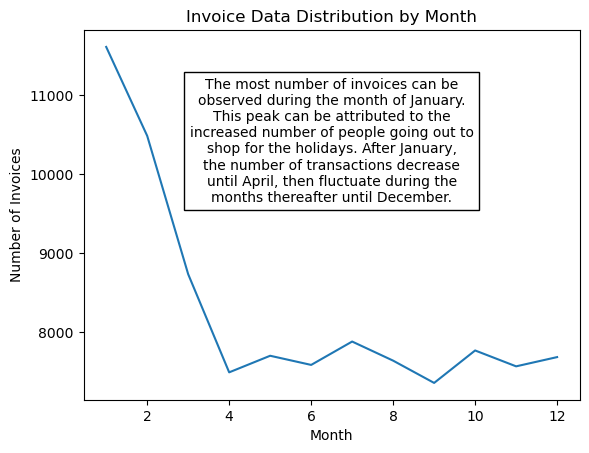

In [103]:
import matplotlib.pyplot as plt
import textwrap

plt.plot(invoice_distribution_month.index, invoice_distribution_month.values)
plt.xlabel('Month')
plt.ylabel('Number of Invoices')
plt.title('Invoice Data Distribution by Month')
note = 'The most number of invoices can be observed during the month of January. This peak can be attributed to the increased number of people going out to shop for the holidays. After January, the number of transactions decrease until April, then fluctuate during the months thereafter until December.'
wrapped_note = textwrap.fill(note, width=40)
plt.text(0.5, 0.7, wrapped_note, ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white'))
plt.show()

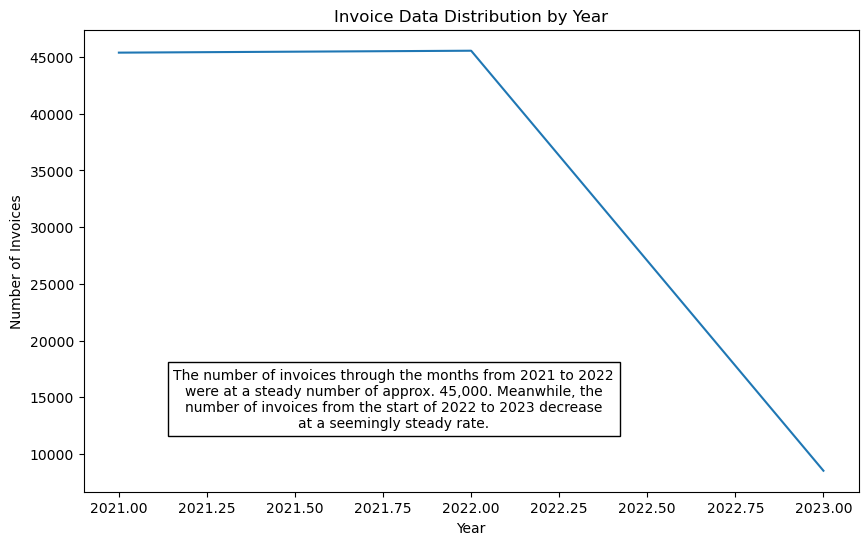

In [101]:
plt.figure(figsize=(10, 6))
plt.plot(invoice_distribution_year.index, invoice_distribution_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Invoices')
plt.title('Invoice Data Distribution by Year')
note1 = 'The number of invoices through the months from 2021 to 2022 were at a steady number of approx. 45,000. Meanwhile, the number of invoices from the start of 2022 to 2023 decrease at a seemingly steady rate.'
wrapped_note1 = textwrap.fill(note1, width=60)
plt.text(0.4, 0.2, wrapped_note1, ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white'))
plt.show()

### Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade, age range (e.g., 10-19, 20-29, and so forth).

In [102]:
df['decade'] = (df['invoice_date'].dt.year // 10) * 10

def get_age_range(age):
    lower_bound = (age // 10) * 10
    upper_bound = lower_bound + 9
    return f'{lower_bound}-{upper_bound}'

dim['age_range'] = dim['age'].apply(get_age_range)
merged_df = pd.merge(df, dim, left_on='customer_id', right_on='id', how='inner')
pivot_table = merged_df.pivot_table(index='category', columns=['decade', 'age_range'], values='sales', aggfunc='sum')
pivot_table = pivot_table.round(2).fillna(0)

# To display the pivot table with improved formatting
pd.set_option('display.float_format', '${:,.2f}'.format)
print(pivot_table)

decade                   2020                                               \
age_range           10.0-19.0      20.0-29.0      30.0-39.0      40.0-49.0   
category                                                                     
Books              $12,801.75     $79,461.75     $84,143.10     $87,203.40   
Clothing        $1,927,413.84 $10,250,732.80 $11,354,126.96 $11,215,189.92   
Cosmetics         $109,619.36    $605,915.32    $723,544.70    $665,034.96   
Food & Beverage    $13,582.31     $73,491.96     $87,246.86     $89,553.29   
Shoes             $993,281.35  $5,924,878.24  $7,200,839.66  $7,025,590.02   
Souvenir           $12,375.15     $54,943.32     $64,092.72     $66,391.80   
Technology      $1,129,800.00  $5,261,550.00  $6,159,300.00  $5,954,550.00   
Toys               $60,426.24    $385,100.80    $420,582.40    $390,906.88   

decade                                                                     \
age_range            50.0-59.0      60.0-69.0     70.0-79.0     